<a href="https://colab.research.google.com/github/jittakorn-ch/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## นำเข้าและอ่านข้อมูล

In [3]:
import pandas as pd   ### import เพื่อใช้งาน pandas

In [4]:
data = pd.read_csv('/content/Pizza.csv')
data

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


## ตรวจสอบว่ามี Data กี่ตัว และ มีกี่ dimensions

In [5]:
data.shape     ### ดูขนาด

(300, 9)

ข้อมูลมี 300 แถว 9 คอลัมน์

## ลอง plot scatter matrix เพื่อดูการกระจายของ Data ในมุมต่างๆ

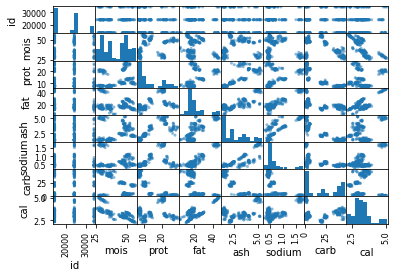

In [ ]:
pd.plotting.scatter_matrix(data);

จากกราฟ พอจะเห็นการกระจายของข้อมูลเมื่อเทียบกับค่าอื่น

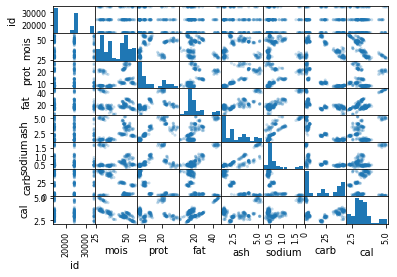

In [ ]:
pd.plotting.scatter_matrix(data,alpha=0.25);

### เลือกมาเฉพาะข้อมูลที่เป็นตัวเลข

In [6]:
newdata = data.iloc[:,2:]    ### ตัดคอลัมน์ที่ 1,2 ออก
newdata.head()    ### แสดงมาบางตัวอย่าง

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


## ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหนด้วย numpy

In [7]:
import numpy as np     ### import เพื่อใช้งาน numpy

In [8]:
corr = np.corrcoef(newdata.to_numpy().T)

In [9]:
corr.shape

(7, 7)

In [10]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [11]:
for i in range(corr.shape[0]):
  for j in range(corr.shape[1]):
    if (i !=j) and (corr[i,j] == 1.):
      print(f'row = {i} colume = {j} corrcofe = {corr[i,j]}')

ไม่มีค่า correlatoin = 1 แสดงว่า ไม่มีค่าซ้ำกัน

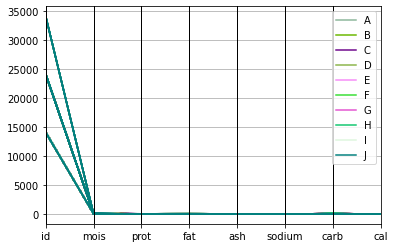

In [12]:
pd.plotting.parallel_coordinates(data,'brand')

มองข้อมูลไม่ออก เพราะยังมีข้อมูลที่ไม่เป็นตัวเลข คือ id

In [13]:
data_dropped = data.drop(['id'],axis=1)   ### ตัดคอลัมน์ id ออก
data_dropped

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


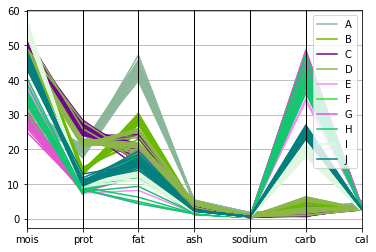

In [14]:
pd.plotting.parallel_coordinates(data_dropped,'brand')

จากกราฟ พอจะมองเห็นการเกาะกลุ่มกันของ data แต่ละชุด

## ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล

In [15]:
from sklearn.decomposition import PCA    ### import เพื่อใช้งาน PCA

In [16]:
pca = PCA(n_components=2)    ### ใช้ 2 dimensions

In [19]:
new_pca = pca.fit_transform(newdata.to_numpy())     ### ใช้ชุดข้อมูลที่มีเฉพาะตัวเลข

In [20]:
new_pca.shape

(300, 2)

เหลือข้อมูล 300 แถว 2 คอลัมน์

In [21]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

In [23]:
BR = set(data['brand'])    ### แบ่งข้อมูลออกเป็น set
BR

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [24]:
BR_l = list(BR)  ### แปลงเป็น list
BR_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list = {}
num = 0
for each_br in BR_l:
    if each_br not in color_list:
        color_list[each_br] = num
        num += 1

In [25]:
color_list

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

##แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [27]:
data_dropped2 = data_dropped.replace(color_list)     ### เปลี่ยน text เป็น ตัวเลข ด้วยการแทนค่าใน dictionary
data_dropped2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


### ลอง Plot กราฟ Scatter

In [28]:
from matplotlib import pyplot as plt   ### import เพื่อใช้งาน pyplot

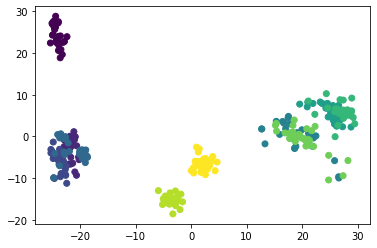

In [29]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['brand'])    ### พอร์ตข้อมูลตาม brand

จากกราฟ จะเห็นว่าข้อมูลมีการเกาะกลุ่มกันเป็นชุดๆ 

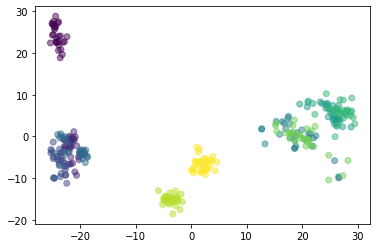

In [30]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['brand'],alpha=0.5)

## 2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [74]:
pca.explained_variance_ratio_    ### ดูว่าสามารถอธิบายข้อมุลได้ดีแค่ไหน

array([0.98936748, 0.00820241])

สามารถมารถอธิบายข้อมูลได้ 99%

### ลองเปรียบเทียบ brand 

#### เทียบ brand A กับ B




In [75]:
AB = data_dropped2[(data_dropped2['brand']==0) | (data_dropped2['brand']==1)]
AB.head()

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [76]:
A_pca = pca.transform(AB[AB['brand']==0].iloc[:,1:].to_numpy())
B_pca = pca.transform(AB[AB['brand']==1].iloc[:,1:].to_numpy())

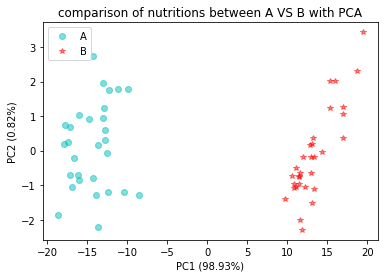

In [77]:
plt.plot(A_pca[:,0],A_pca[:,1],'oc',alpha=0.5,label='A')
plt.plot(B_pca[:,0],B_pca[:,1],'*r',alpha=0.5,label='B')
plt.legend()
plt.title('comparison of nutritions between A VS B with PCA')
plt.xlabel('PC1 (98.93%)')
plt.ylabel('PC2 (0.82%)');

จากกราฟ จะเห็นว่าข้อมูลมีการแบ่งออกจากกันอย่างชัดเจน ระหว่าง brand A กับ B

#### เทียบ brand D กับ F 

In [78]:
DF = data_dropped2[(data_dropped2['brand']==3) | (data_dropped2['brand']==5)]
DF.head()

,brand,mois,prot,fat,ash,sodium,carb,cal
87,3,46.64,21.38,24.96,4.60,0.77,2.42,3.20
88,3,45.93,21.60,25.87,4.51,0.73,2.09,3.28
89,3,47.60,22.07,21.13,4.07,0.72,5.13,2.99
90,3,47.61,22.44,19.61,4.06,0.60,6.28,2.91
91,3,46.91,21.79,21.17,4.06,0.76,6.07,3.02


In [79]:
D_pca = pca.transform(DF[DF['brand']==3].iloc[:,1:].to_numpy())
F_pca = pca.transform(DF[DF['brand']==5].iloc[:,1:].to_numpy())

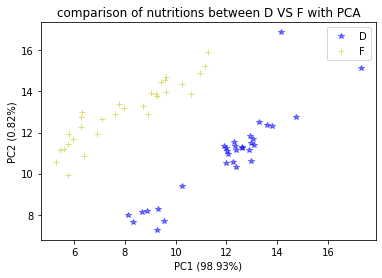

In [80]:
plt.plot(D_pca[:,0],D_pca[:,1],'*b',alpha=0.5,label='D')
plt.plot(F_pca[:,0],F_pca[:,1],'+y',alpha=0.5,label='F')
plt.legend()
plt.title('comparison of nutritions between D VS F with PCA')
plt.xlabel('PC1 (98.93%)')
plt.ylabel('PC2 (0.82%)');

จากกราฟ จะเห็นว่าข้อมูลมีการแบ่งออกจากกันอย่างชัดเจน ระหว่าง brand D กับ F



#### เทียบ brand E กับ J

In [81]:
EJ = data_dropped2[(data_dropped2['brand']==4) | (data_dropped2['brand']==9)]
EJ.head()

,brand,mois,prot,fat,ash,sodium,carb,cal
119,4,34.58,7.44,16.24,1.31,0.39,40.43,3.38
120,4,36.84,7.77,17.07,1.37,0.40,36.95,3.33
121,4,35.14,8.05,15.77,1.38,0.41,39.66,3.33
122,4,39.25,8.67,4.44,1.54,0.51,46.10,2.59
123,4,34.51,7.75,14.87,1.42,0.42,41.45,3.31


In [82]:
E_pca = pca.transform(EJ[EJ['brand']==4].iloc[:,1:].to_numpy())
J_pca = pca.transform(EJ[EJ['brand']==9].iloc[:,1:].to_numpy())

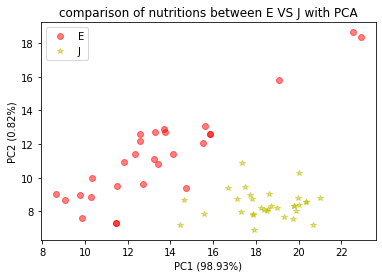

In [83]:
plt.plot(E_pca[:,0],E_pca[:,1],'or',alpha=0.5,label='E')
plt.plot(J_pca[:,0],J_pca[:,1],'*y',alpha=0.5,label='J')
plt.legend()
plt.title('comparison of nutritions between E VS J with PCA')
plt.xlabel('PC1 (98.93%)')
plt.ylabel('PC2 (0.82%)');

จากกราฟ จะเห็นว่าข้อมูลมีการแบ่งออกจากกันอย่างชัดเจน ระหว่าง brand E กับ J